# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

Previously, you looked at all the requirements for running an OLS simple linear regression using Statsmodels. You worked with the height-weight data set to understand the process and all of the necessary steps that must be performed. In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:
* Perform a linear regression using statsmodels
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Determine if a particular set of data exhibits the assumptions of linear regression

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('advertising.csv')
df = df.drop(labels = 'Unnamed: 0',axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


It looks to me like each record indicates a time period (weeks,days?) and the TV,radio,and newspaper columns are dollar amounts spent on advertising. I suspect the 'sales' column is sales lead generated. I will set dollars spent by category are our independent variables and the sales will be the dependent variable.

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

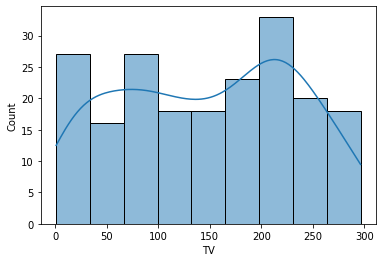

In [25]:
sns.histplot(data=df,x='TV',kde=True);

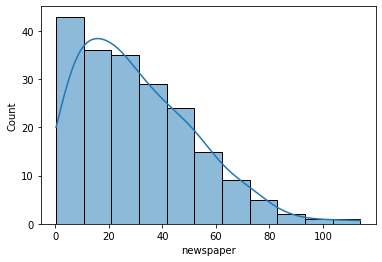

In [26]:
sns.histplot(data=df,x='newspaper',kde=True);

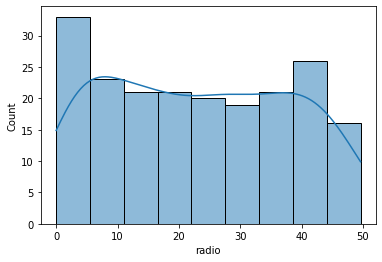

In [27]:
sns.histplot(data=df,x='radio',kde=True);

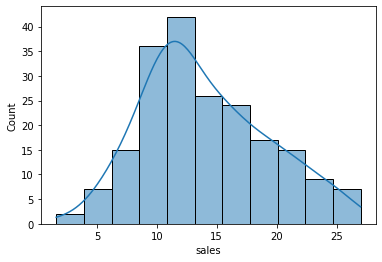

In [29]:
sns.histplot(data=df,x='sales',kde=True);

In [ ]:
# Record your observations here 


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

''

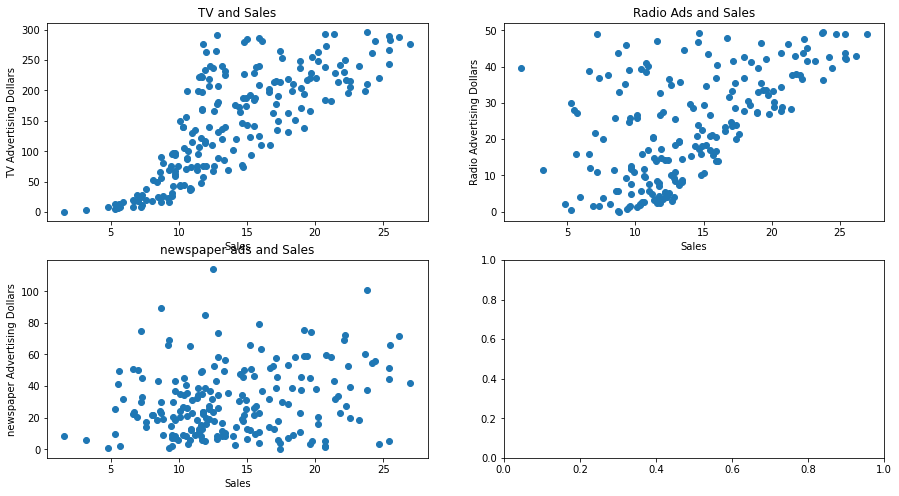

In [55]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
ax1.scatter(df.sales,df['TV'])
ax1.set_title('TV and Sales')
ax1.set_xlabel('Sales')
ax1.set_ylabel('TV Advertising Dollars')
ax2.scatter(df.sales,df['radio'])
ax2.set_title('Radio Ads and Sales')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Radio Advertising Dollars')
ax3.scatter(df.sales,df['newspaper'])
ax3.set_title('newspaper ads and Sales')
ax3.set_xlabel('Sales')
ax3.set_ylabel('newspaper Advertising Dollars')
;

The relationship between dollars invested in advertising for both radio and tv have a positive linear relationship. The are both fairly noisy, with radio moreso than tv.

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [60]:
fig = px.scatter(df,x='TV',y='sales',trendline='ols',title='TV Advertising Dollars and Sales')
model = sm.formula.ols(formula='sales~TV',data=df).fit()
fig.show()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        10:03:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 5: Get Regression Diagnostics Summary

*Given the r squared value, the relationship between advertising dollars spent on TV and sales explains 61% of the variation in the data.*

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [ ]:
# create a DataFrame with the minimum and maximum values of TV

# make predictions for those x values and store them


# first, plot the observed data and the least squares line

## Step 7: Visualize the error term for variance and heteroscedasticity

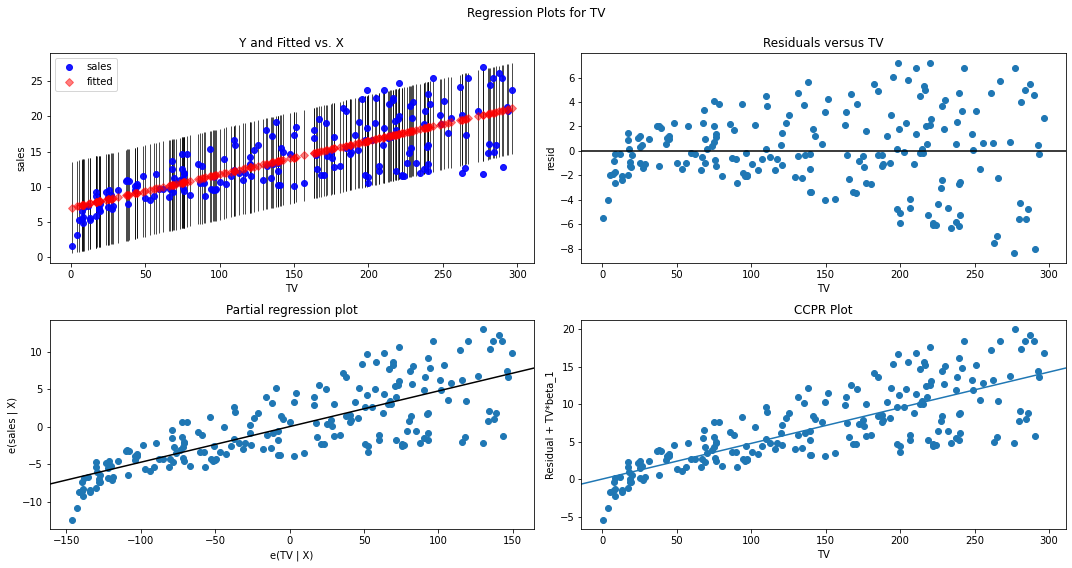

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

From the first and second plot in the first row, we see a cone-shape which is a sign of heteroscedasticity. 
i.e. the residuals are heteroscedastic. This violates an assumption.

## Step 8: Check the normality assumptions by creating a QQ-plot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



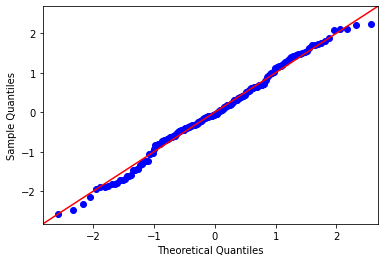

In [62]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

*The normality assumption of the residuals seems to be fulfilled, given the qq plot*


## Step 9: Repeat the above for radio and record your observations

In [63]:
fig = px.scatter(df,x='radio',y='sales',trendline='ols',title='Radio Advertising Dollars and Sales')
model = sm.formula.ols(formula='sales~radio',data=df).fit()
fig.show()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           4.35e-19
Time:                        14:11:41   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



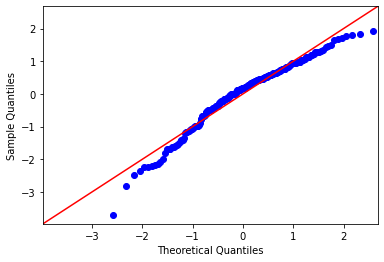

In [64]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

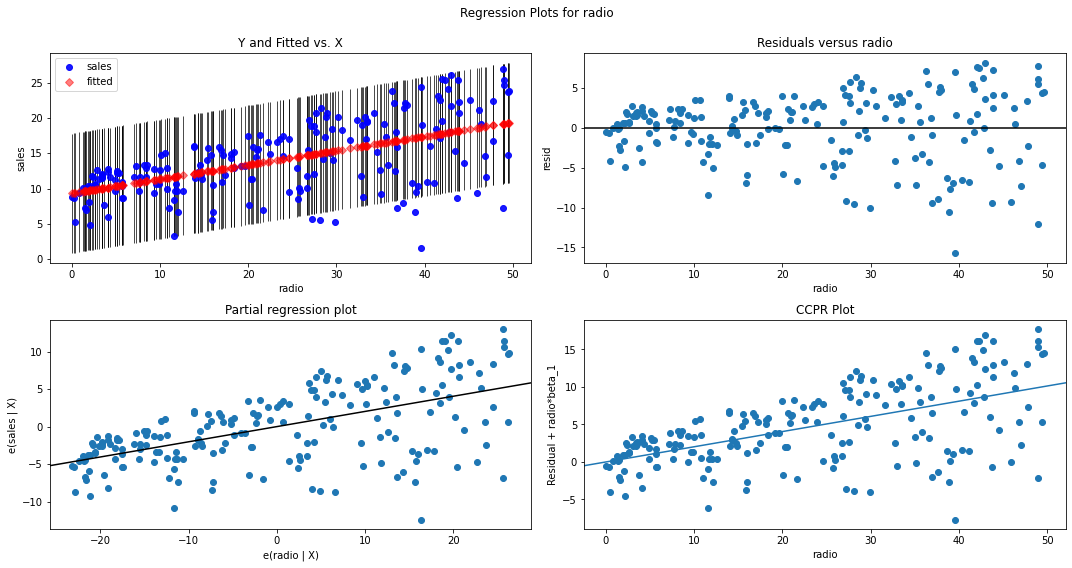

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
plt.show()

## The Answer

Based on the above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of techniques we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used statsmodel to perform linear regression and evaluated your models using statistical metrics. You also looked for the regression assumptions before and after the analysis phase. Finally, you created some visualizations of your models and checked their goodness of fit. 